In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [8]:
df= pd.read_csv("C:/Users/LENOVO/Downloads/List of Countries by Sugarcane Production.csv")

In [10]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [12]:
df.tail()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
98,98,Lebanon,Asia,97,16,3,"28.386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11.949,8"
102,102,Syria,Asia,1,0,0,"83.034,2"


In [18]:
df.shape

(103, 7)

Data Cleaning

In [24]:
df["Production (Tons)"]=df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].str.replace(",","").str.replace(",",".")

In [ ]:
df.head()

In [38]:
df.rename(columns={"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns={"Production per Person (Kg)" : "Production_per_Person(Kg)"}, inplace = True)
df.rename(columns={"Acreage (Hectare)" : "Acreage(Hectare)"}, inplace = True)
df.rename(columns={"Yield (Kg / Hectare)" : "Yield(Kg/Hectare)"}, inplace = True)

In [40]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75.1675
1,1,India,Asia,348448000,260721,4950000,70.3935
2,2,China,Asia,123059739,88287,1675215,73.4591
3,3,Thailand,Asia,87468496,1264.303,1336575,65.4422
4,4,Pakistan,Asia,65450704,324219,1130820,57.879


In [42]:
df.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [44]:
df[df["Acreage(Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [48]:
df=df.dropna().reset_index()

In [52]:
df.head()


,level_0,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,0,Brazil,South America,768678382,3668.531,10226205,75.1675
1,1,1,1,India,Asia,348448000,260721,4950000,70.3935
2,2,2,2,China,Asia,123059739,88287,1675215,73.4591
3,3,3,3,Thailand,Asia,87468496,1264.303,1336575,65.4422
4,4,4,4,Pakistan,Asia,65450704,324219,1130820,57.879


In [63]:
df.head() 

,level_0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75.1675
1,1,India,Asia,348448000,260721,4950000,70.3935
2,2,China,Asia,123059739,88287,1675215,73.4591
3,3,Thailand,Asia,87468496,1264.303,1336575,65.4422
4,4,Pakistan,Asia,65450704,324219,1130820,57.879


In [65]:
print(df.columns)


Index(['level_0', 'Country', 'Continent', 'Production(Tons)',
       'Production_per_Person(Kg)', 'Acreage(Hectare)', 'Yield(Kg/Hectare)'],
      dtype='object')


In [71]:
df.drop("level_0", axis=1, inplace=True)


In [73]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75.1675
1,India,Asia,348448000,260721,4950000,70.3935
2,China,Asia,123059739,88287,1675215,73.4591
3,Thailand,Asia,87468496,1264.303,1336575,65.4422
4,Pakistan,Asia,65450704,324219,1130820,57.879


Univariate Analysis

In [75]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [81]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_Person(Kg)"] = df["Production_per_Person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)


In [83]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75.1675
1,India,Asia,348448000.0,260721.000,4950000.0,70.3935
2,China,Asia,123059739.0,88287.000,1675215.0,73.4591
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65.4422
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57.8790


In [85]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

In [87]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

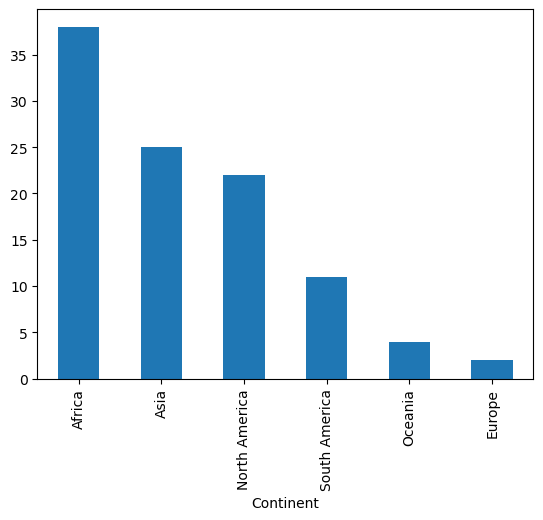

In [91]:
df["Continent"].value_counts().plot(kind= "bar")

Distribution of the columns

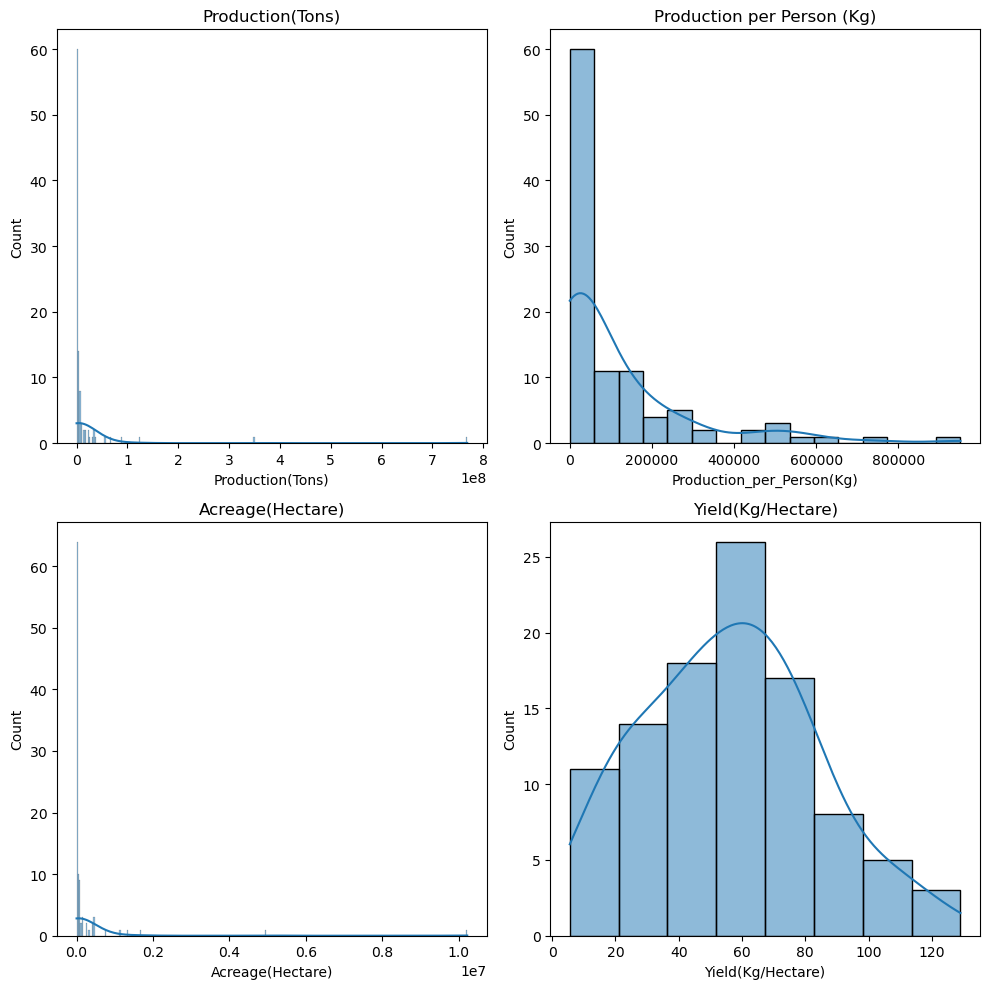

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.histplot(df["Production(Tons)"], kde=True)
plt.title("Production(Tons)")

plt.subplot(2, 2, 2)
sns.histplot(df["Production_per_Person(Kg)"], kde=True)
plt.title("Production per Person (Kg)")

plt.subplot(2, 2, 3)
sns.histplot(df["Acreage(Hectare)"], kde=True)
plt.title("Acreage(Hectare)")

plt.subplot(2, 2, 4)
sns.histplot(df["Yield(Kg/Hectare)"], kde=True)
plt.title("Yield(Kg/Hectare)")

plt.tight_layout()
plt.show()


In [101]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,56.190931
std,8.419149e+07,176651.341929,1.137003e+06,27.569322
min,1.000000e+00,0.000000,0.000000e+00,5.577800
25%,6.251875e+04,3671.910000,1.104000e+03,36.809325
50%,1.440044e+06,25572.500000,1.655800e+04,55.679950
75%,6.426824e+06,146384.750000,8.047400e+04,73.706675
max,7.686784e+08,951087.000000,1.022620e+07,129.049300


In [103]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75.1675
1,India,Asia,348448000.0,260721.000,4950000.0,70.3935
2,China,Asia,123059739.0,88287.000,1675215.0,73.4591
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65.4422
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57.8790


Which country produces maximum sugarcane?

In [105]:
df_new = df[["Country","Production(Tons)"]].set_index("Country")

In [107]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [109]:
df_new["Production(Tons)_percent"] = df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()

In [111]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

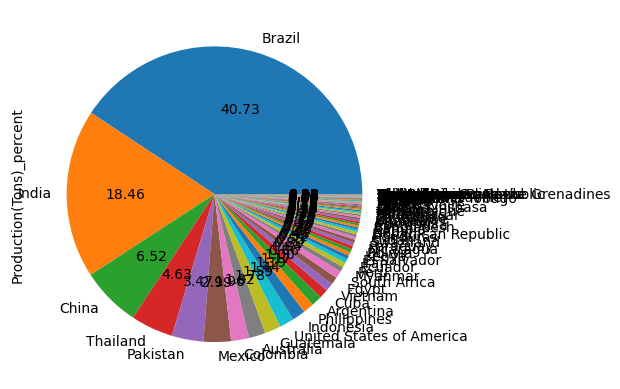

In [113]:
df_new["Production(Tons)_percent"].plot(kind = "pie", autopct = "%.2f")

<Axes: xlabel='Country'>

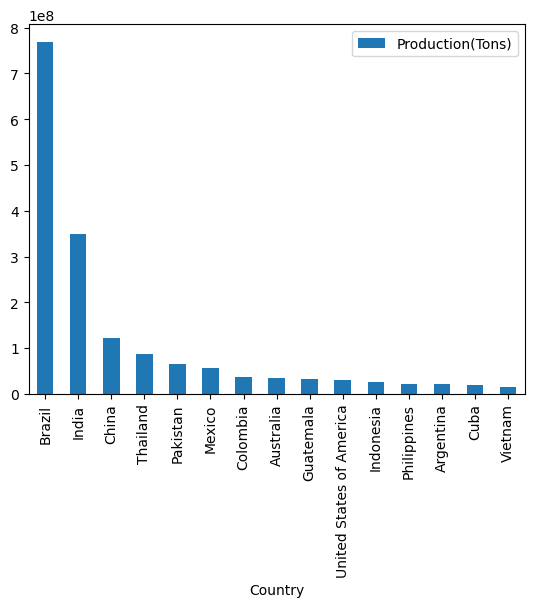

In [115]:
df[["Country","Production(Tons)"]].set_index("Country").sort_values("Production(Tons)", ascending = False).head(15).plot(kind = "bar")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1848\2823669880.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


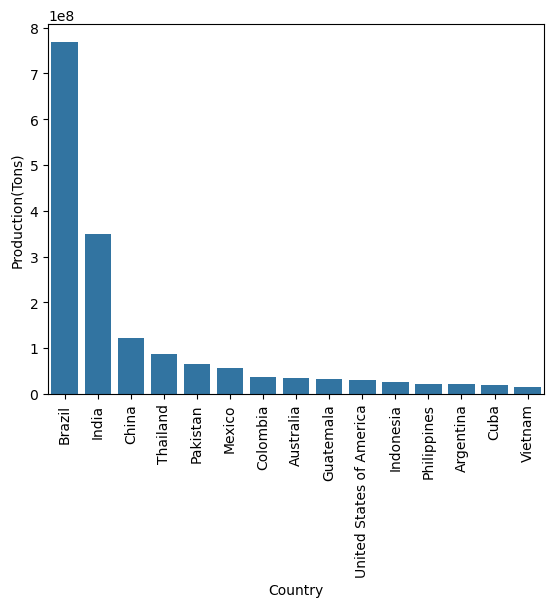

In [116]:
ax = sns.barplot(data = df.head(15),  x= "Country", y = "Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1848\2973715568.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


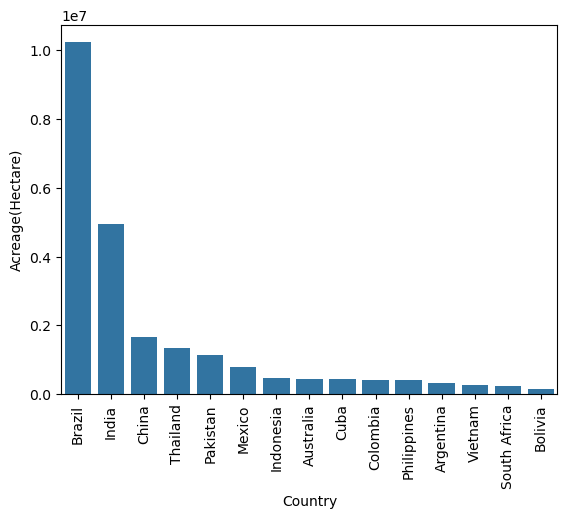

In [119]:
df_acr = df.sort_values("Acreage(Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_acr,  x= "Country", y = "Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

In [ ]:
Which country has highest land?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1848\2860594357.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


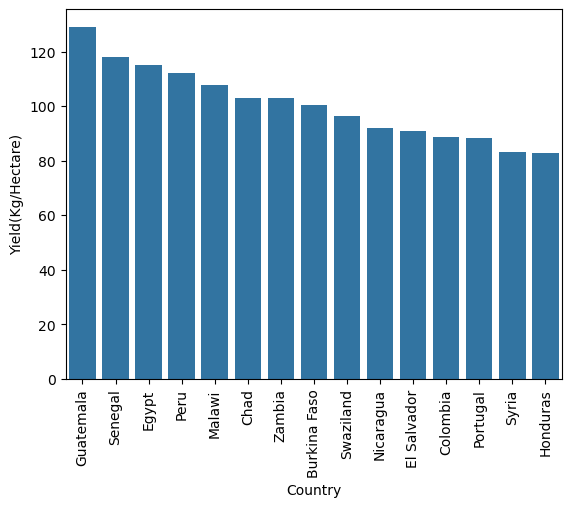

In [121]:
df_yield = df.sort_values("Yield(Kg/Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

In [129]:
print(df.columns)


Index(['Country', 'Continent', 'Production(Tons)', 'Production_per_Person(Kg)',
       'Acreage(Hectare)', 'Yield(Kg/Hectare)'],
      dtype='object')


In [ ]:
Which country has highest production?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1848\1879592012.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


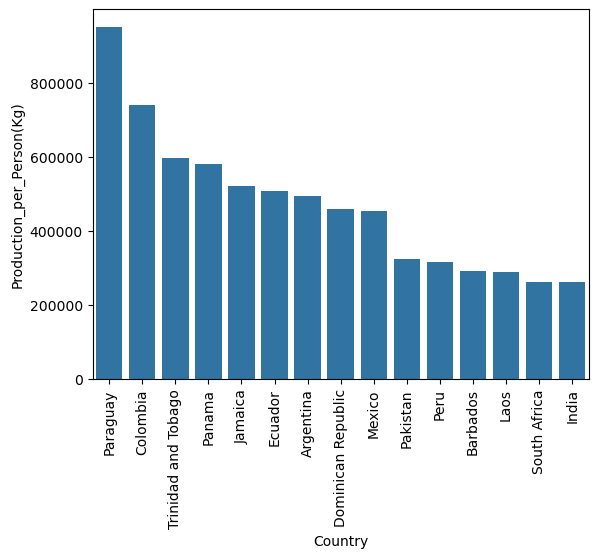

In [131]:
df_yield = df.sort_values("Production_per_Person(Kg)", ascending=False).head(15)
ax = sns.barplot(data=df_yield, x="Country", y="Production_per_Person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


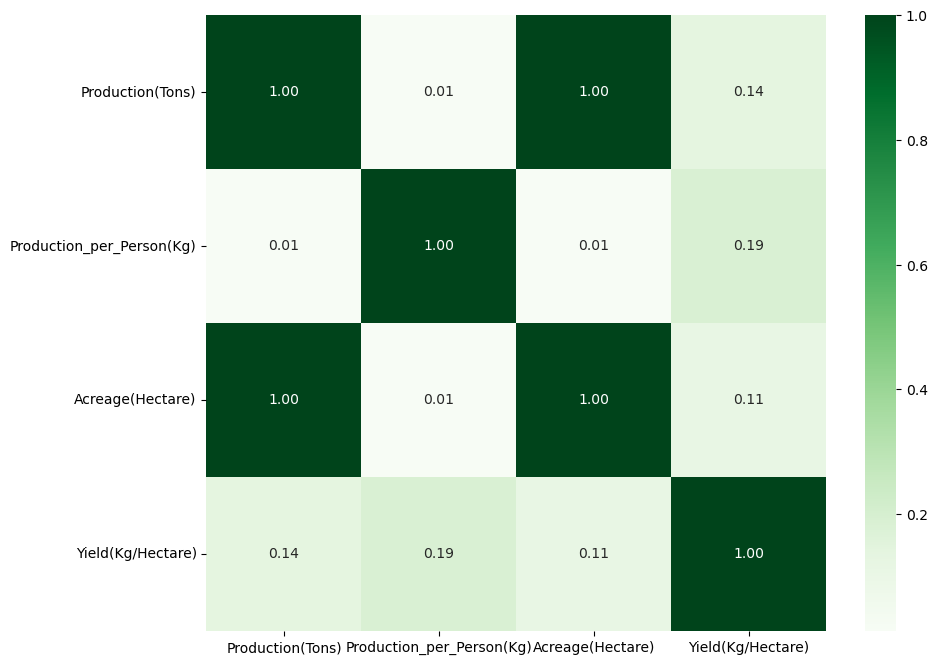

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", fmt='.2f')
plt.show()


Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

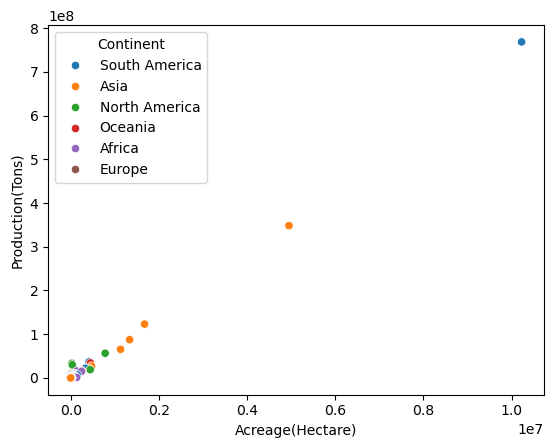

In [141]:
sns.scatterplot(data = df, x = "Acreage(Hectare)", y = "Production(Tons)", hue = "Continent" )

Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

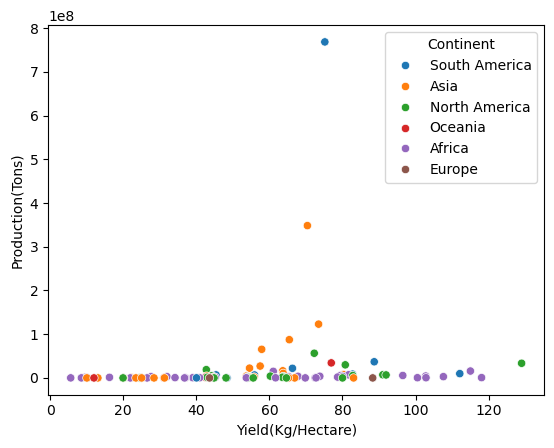

In [143]:
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)" , y = "Production(Tons)", hue = "Continent")

In [145]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75.1675
1,India,Asia,348448000.0,260721.000,4950000.0,70.3935
2,China,Asia,123059739.0,88287.000,1675215.0,73.4591
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65.4422
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57.8790


Analysis for Continent

In [147]:
df_continent = df.groupby("Continent").sum()

In [149]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]

In [151]:
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142.1075,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1226.8164,25
Europe,PortugalSpain,5823.0,536.000,71.0,131.8709,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1335.7274,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162.4191,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,732.5337,11


Which continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

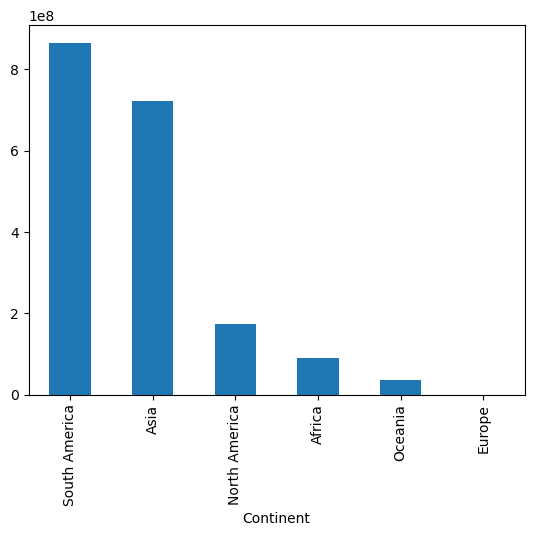

In [153]:
df_continent["Production(Tons)"].sort_values(ascending =  False).plot(kind = "bar")


Do number of countries in a Continent effects production of sugarcane?

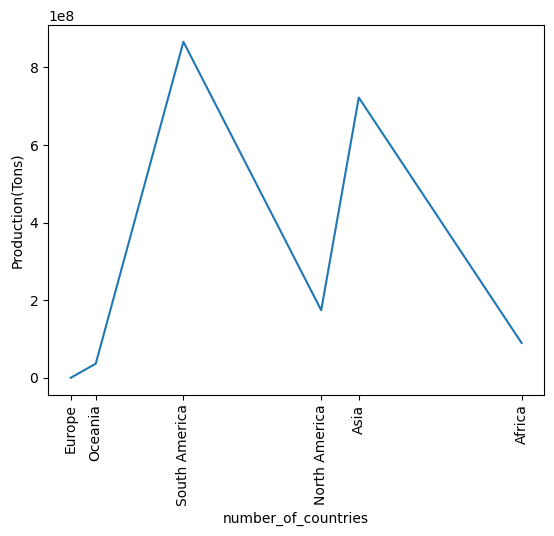

In [155]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x = "number_of_countries", y= "Production(Tons)" )
plt.xticks(df_continent["number_of_countries"], continent_names, rotation =90)
plt.show()

Do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

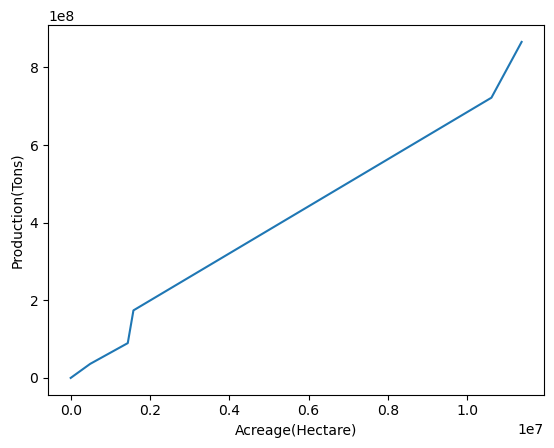

In [157]:
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" )

Production distribution by continent

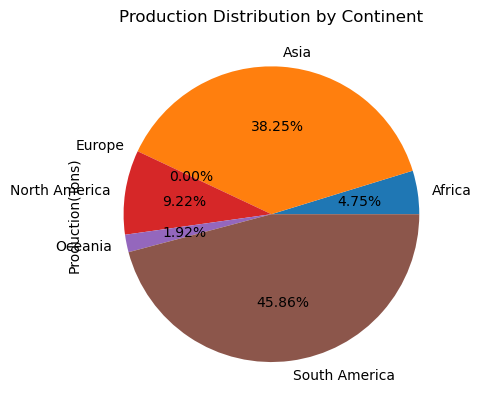

In [159]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()

In [ ]:
df_continent.corr()